In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt 
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell
import datetime as dt

In [2]:
sales_data = pd.read_csv("sales_2019.csv")

In [3]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016"
185946,319667,AA Batteries (4-pack),2,3.84,12/1/2019 12:01,"549 Willow St, Los Angeles, CA 90001"
185947,319668,Vareebadd Phone,1,400.00,12/9/2019 6:43,"273 Wilson St, Seattle, WA 98101"
185948,319669,Wired Headphones,1,11.99,12/3/2019 10:39,"778 River St, Dallas, TX 75001"


In [4]:
# convert it using to_datetime() function
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
# let's see it
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
185947,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [5]:
#For easier analysis, we will add year, month, hour, sales, and cities columns, along with new functions 
def augment_data(data):
    
    # function to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # function to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data from the order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data from the order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the hour data from the order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data from the order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data from the purchase address column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data # returning data

# and see it
sales_data = augment_data(sales_data)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,21,25,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,14,15,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,13,33,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,20,33,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,11,59,11.99,Austin (TX)


# What was the best month for sales? How much was earned that month?

C:\Users\16096\AppData\Local\Temp\ipykernel_5068\2705691494.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_of_month_and_earned = sales_data.groupby('Month').sum().astype('int')


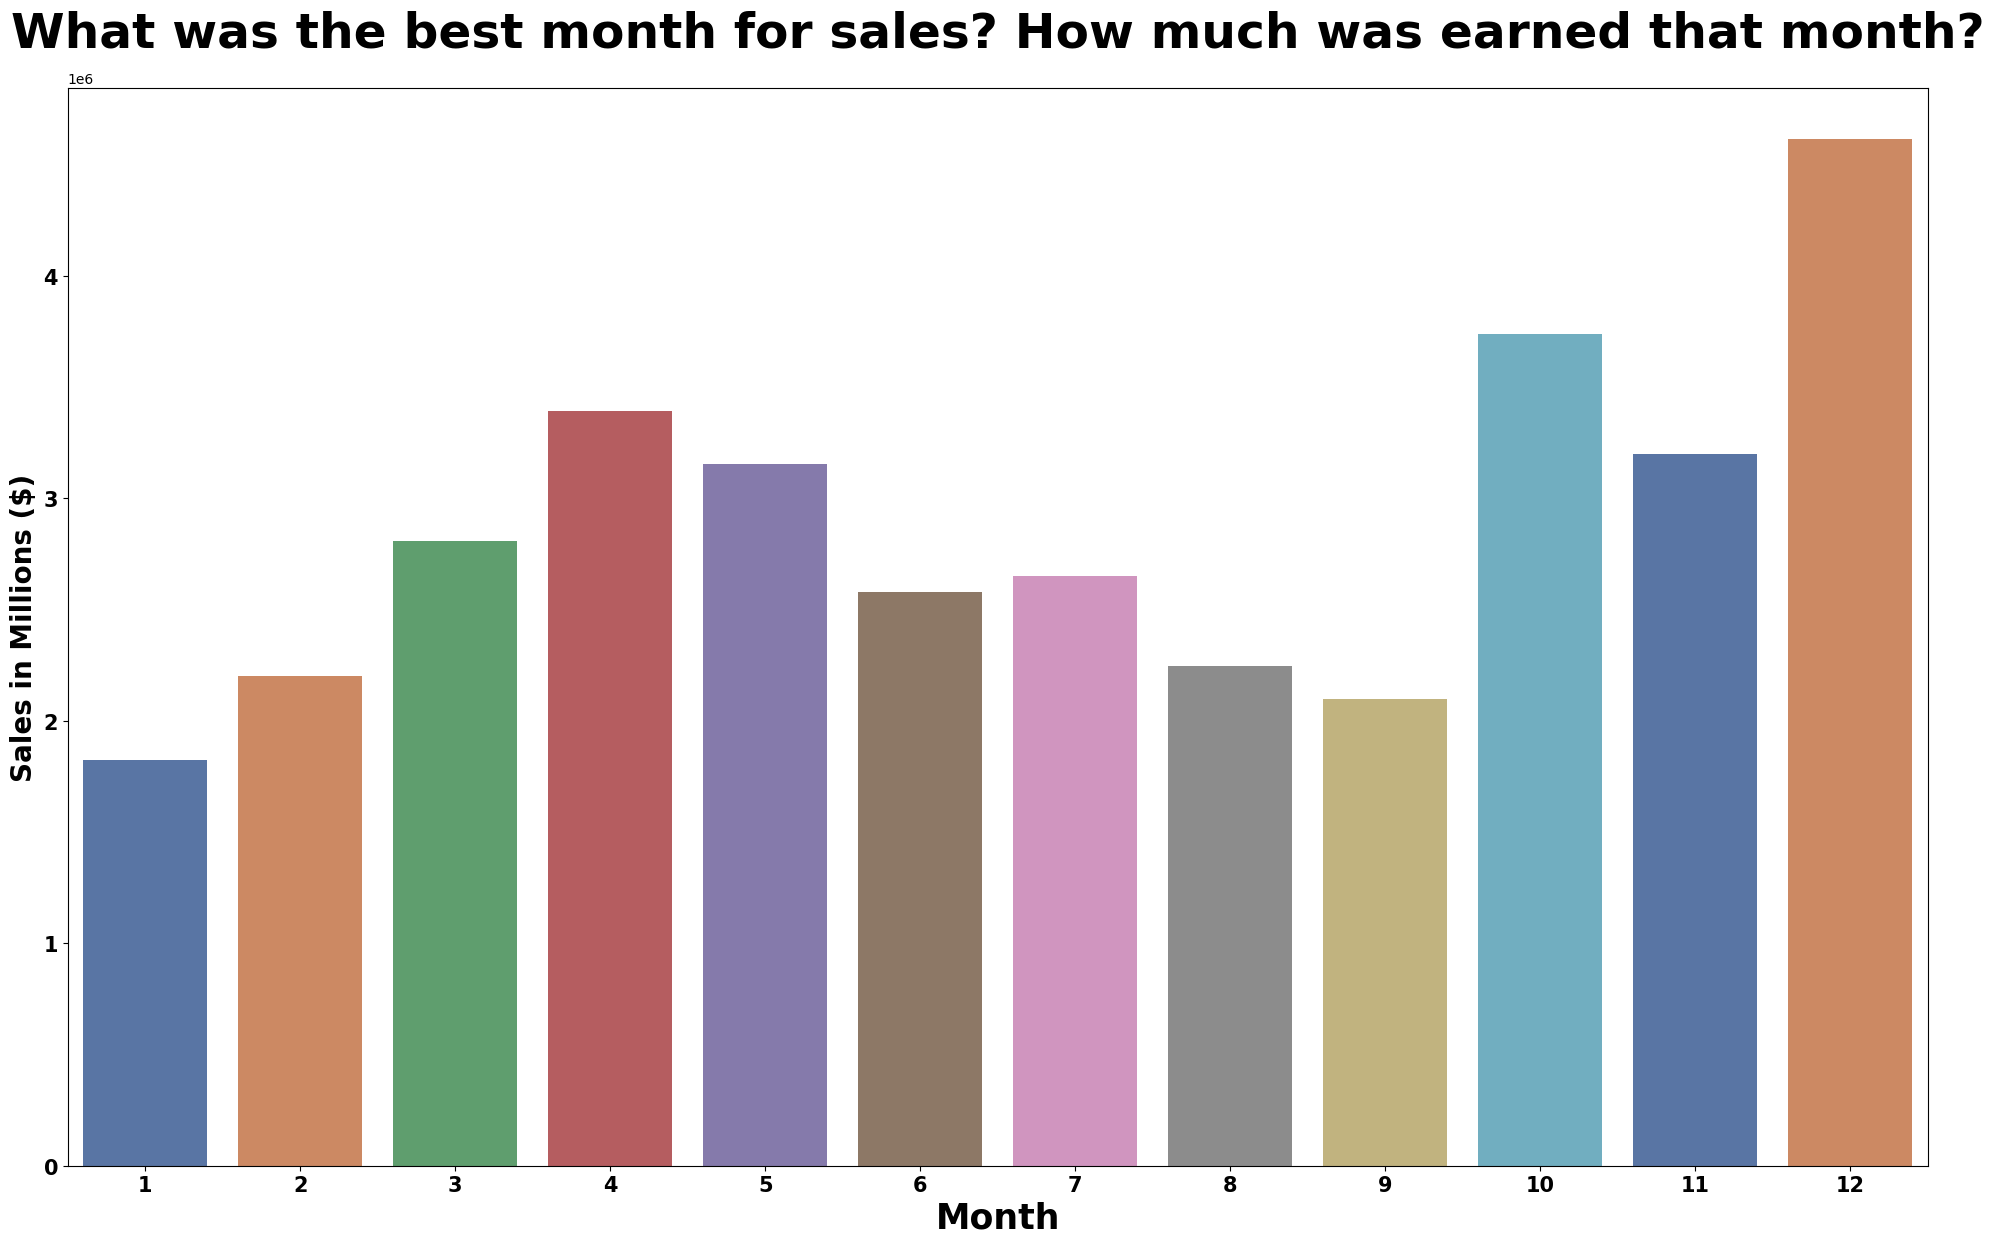

In [6]:
# group the Month cols
sum_of_month_and_earned = sales_data.groupby('Month').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) 
# make bar plot 
sns.barplot( 
    x=sum_of_month_and_earned.index, 
    y=sum_of_month_and_earned["Sales"], 
    data=sum_of_month_and_earned, 
    palette="deep" 
)
plt.title( 
    "What was the best month for sales? How much was earned that month?", 
    weight="bold", 
    fontsize=35, 
    pad=30 
)
plt.xlabel( 
    "Month", 
    weight="bold", 
    color="black", 
    fontsize=25, 
    loc="center" 
)
plt.xticks( 
    weight="bold", 
    fontsize=15 
)
plt.ylabel( 
    "Sales in Millions ($)", 
    weight="bold", 
    color="black",
    fontsize=20 
)
plt.yticks( 
    weight="bold",
    fontsize=15 
);


According to the graph, the best month to sell is December. The number of sales exceeds $4.5 million. This is most likely because of the holiday season that takes place in December. 

# What City had the highest number of sales?

C:\Users\16096\AppData\Local\Temp\ipykernel_5068\3816313816.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  highest_number_of_sales = sales_data.groupby('Cities').sum().astype('int')


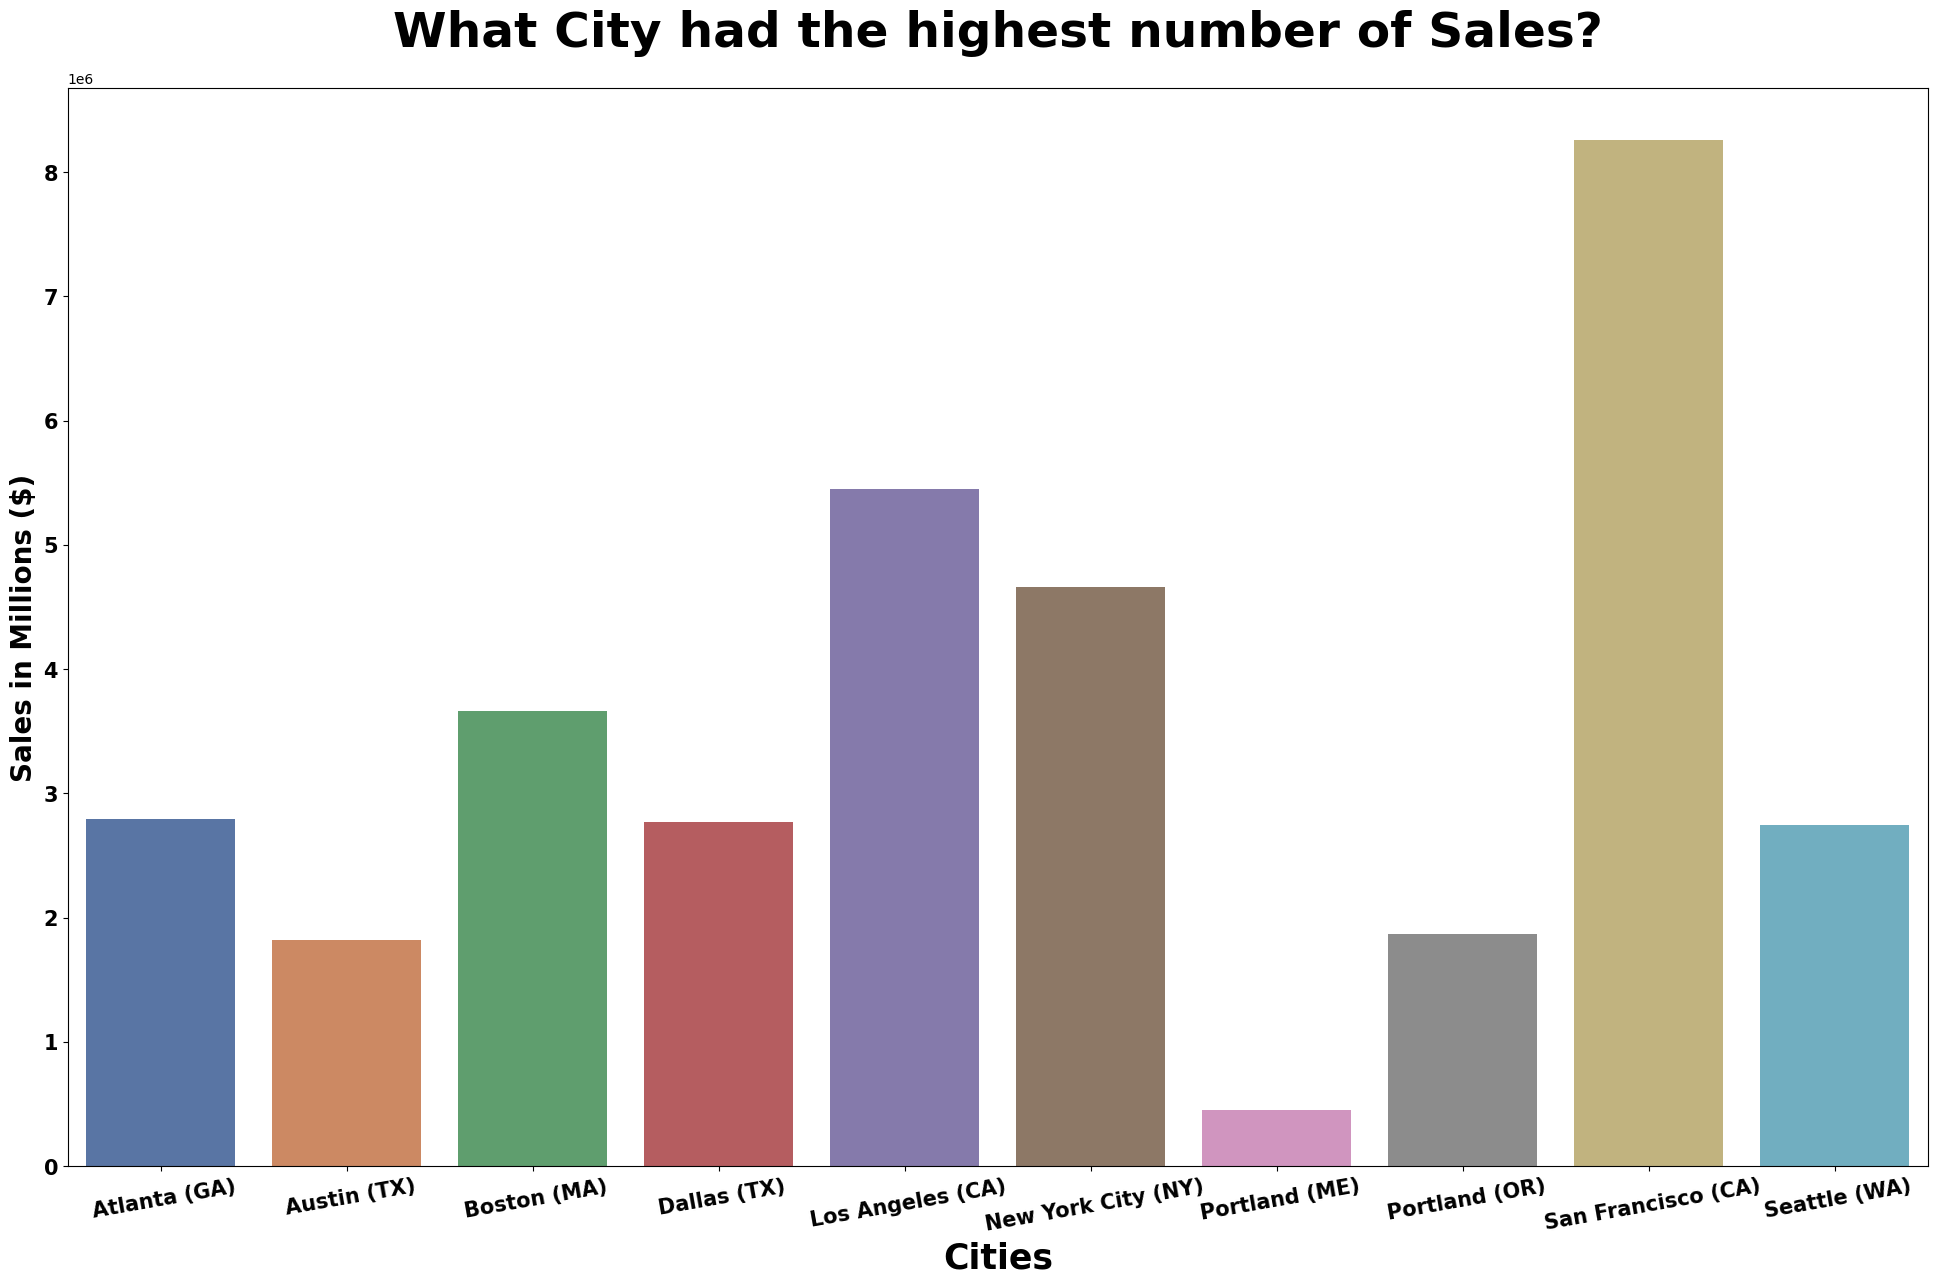

In [7]:
# group of the highest number of sales in city
highest_number_of_sales = sales_data.groupby('Cities').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) 
# makes bar plot 
sns.barplot( 
    x=highest_number_of_sales.index, 
    y=highest_number_of_sales["Sales"], 
    data=highest_number_of_sales, 
    palette="deep" 
)
plt.title(
    "What City had the highest number of Sales?", 
    weight="bold", 
    fontsize=35, 
    pad=30 
)
plt.xlabel( 
    "Cities", 
    weight="bold", 
    color="black", 
    fontsize=25,
    loc="center" 
)
plt.xticks( 
    weight="bold",
    fontsize=15, 
    rotation=10
)
plt.ylabel( 
    "Sales in Millions ($)", 
    weight="bold", 
    color="black", 
    fontsize=20 
)
plt.yticks(
    weight="bold",  
    fontsize=15 
);

According to the graph, San Francisco is the city with the highest amount of sales, with over $8 million. 

# What time should we display adverstisements to maximize the likelihood of customers buying products?

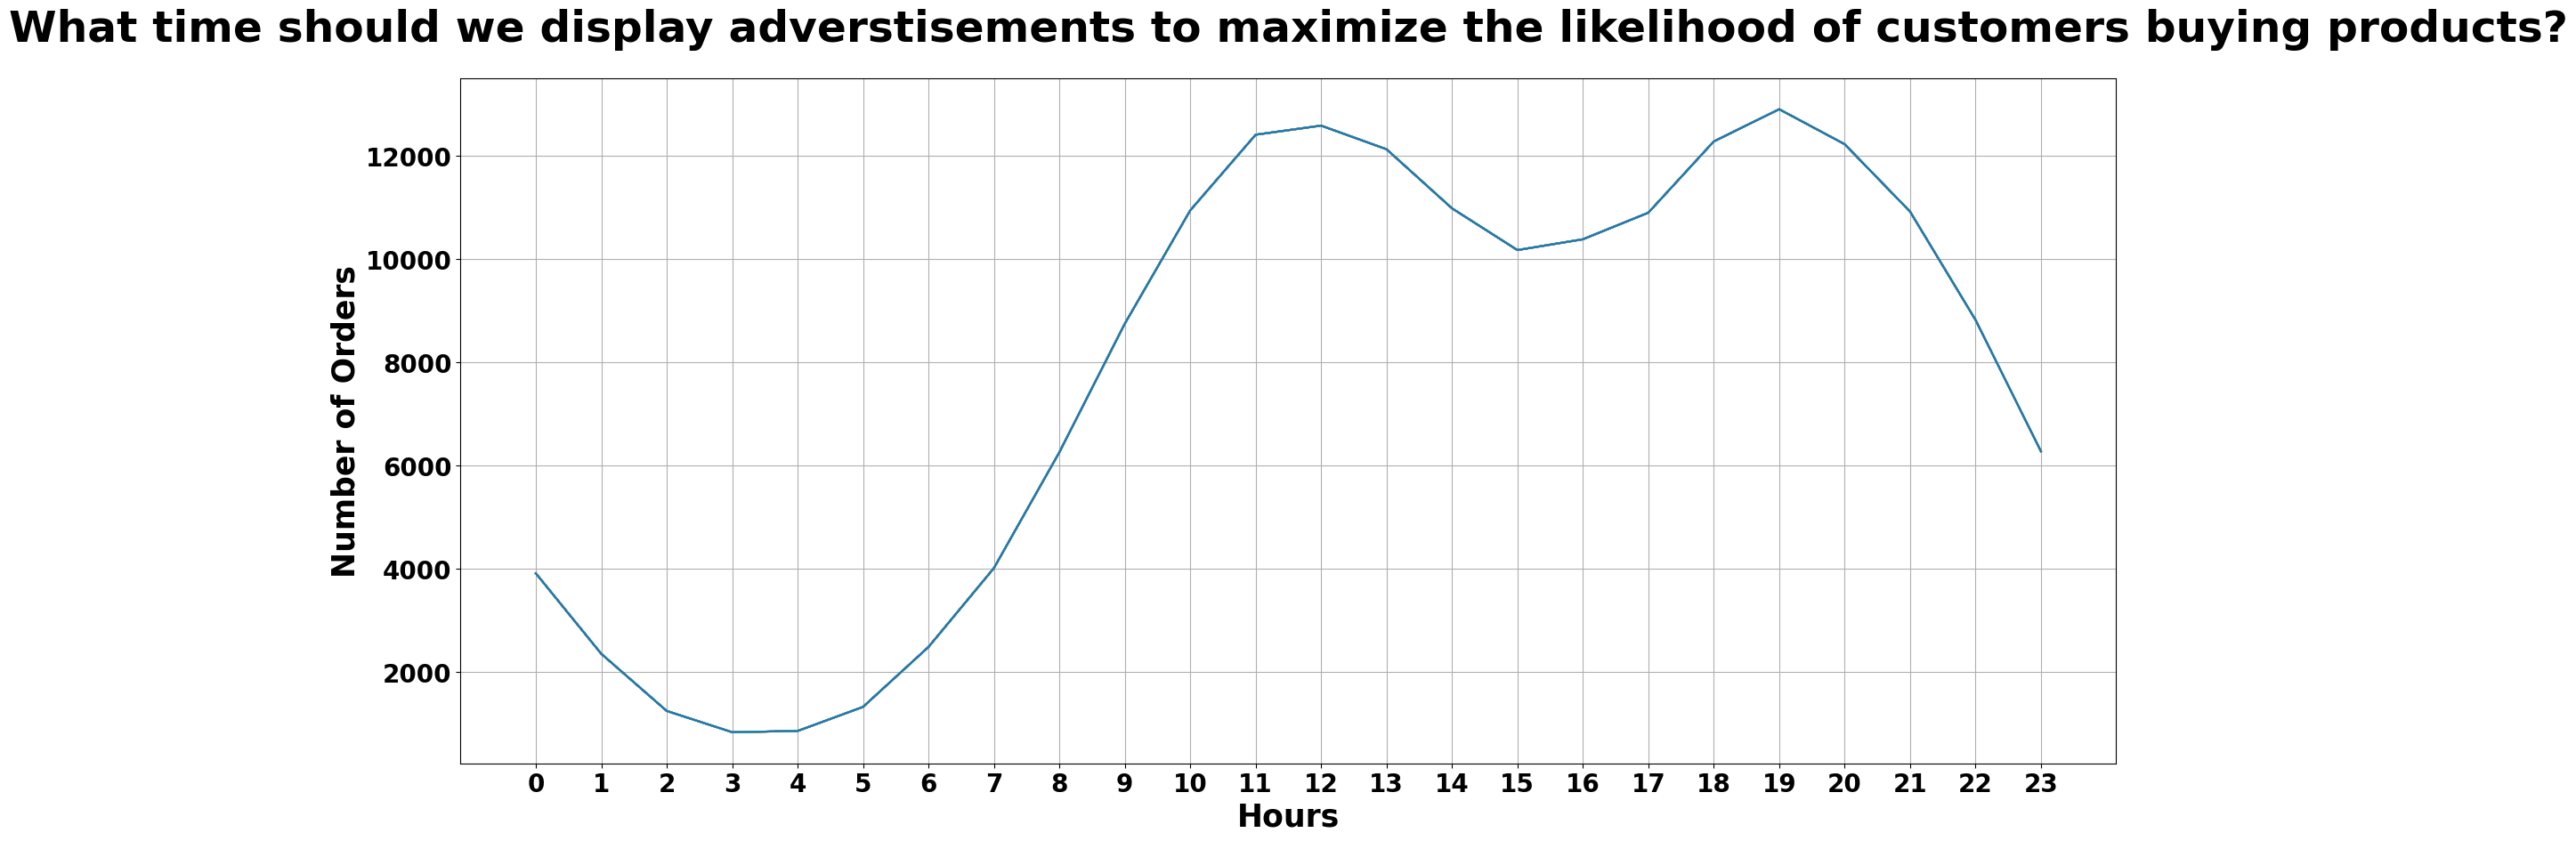

In [8]:
# let's prepare the value for the x-axis
hours = [hour for hour, df in sales_data.groupby('Hour')]
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot 
plt.plot( 
    hours, 
    sales_data.groupby(['Hour']).count() 
)
# let's add grid
plt.grid(True)
plt.title( 
    "What time should we display adverstisements to maximize the likelihood of customers buying products?", 
    weight="bold", 
    fontsize=35, 
    pad=30
)
plt.xlabel( 
    "Hours", 
    weight="bold", 
    color="black", 
    fontsize=25,  
    loc="center" 
)
plt.xticks(
    ticks=hours, 
    weight="bold", 
    fontsize=20 
)
plt.ylabel( 
    "Number of Orders", 
    weight="bold", 
    color="black", 
    fontsize=25 
)
plt.yticks( 
    weight="bold",  
    fontsize=20 
);

The best times to display advertisements to maximize the likelihood of customers buying products is 9 AM to 10 AM, and 4 PM to 5 PM

# What products are most often sold together?

In [9]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = sales_data[sales_data['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# create a new variable for Counter
count = Counter()
# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\16096\AppData\Local\Temp\ipykernel_5068\397145961.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


The two products that are sold together the most are iPhone and Lightning Charging Cable with 1005 orders, while the Google Phone and USB-C Charging Cable are the second highest with 987 orders.  

# What product sold the most? Why do you think it sold the most?

C:\Users\16096\AppData\Local\Temp\ipykernel_5068\2529098983.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']
C:\Users\16096\AppData\Local\Temp\ipykernel_5068\2529098983.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = sales_data.groupby('Product').mean()['Price Each']
C:\Users\16096\AppData\Local\Temp\ipykernel_5068\2529098983.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(


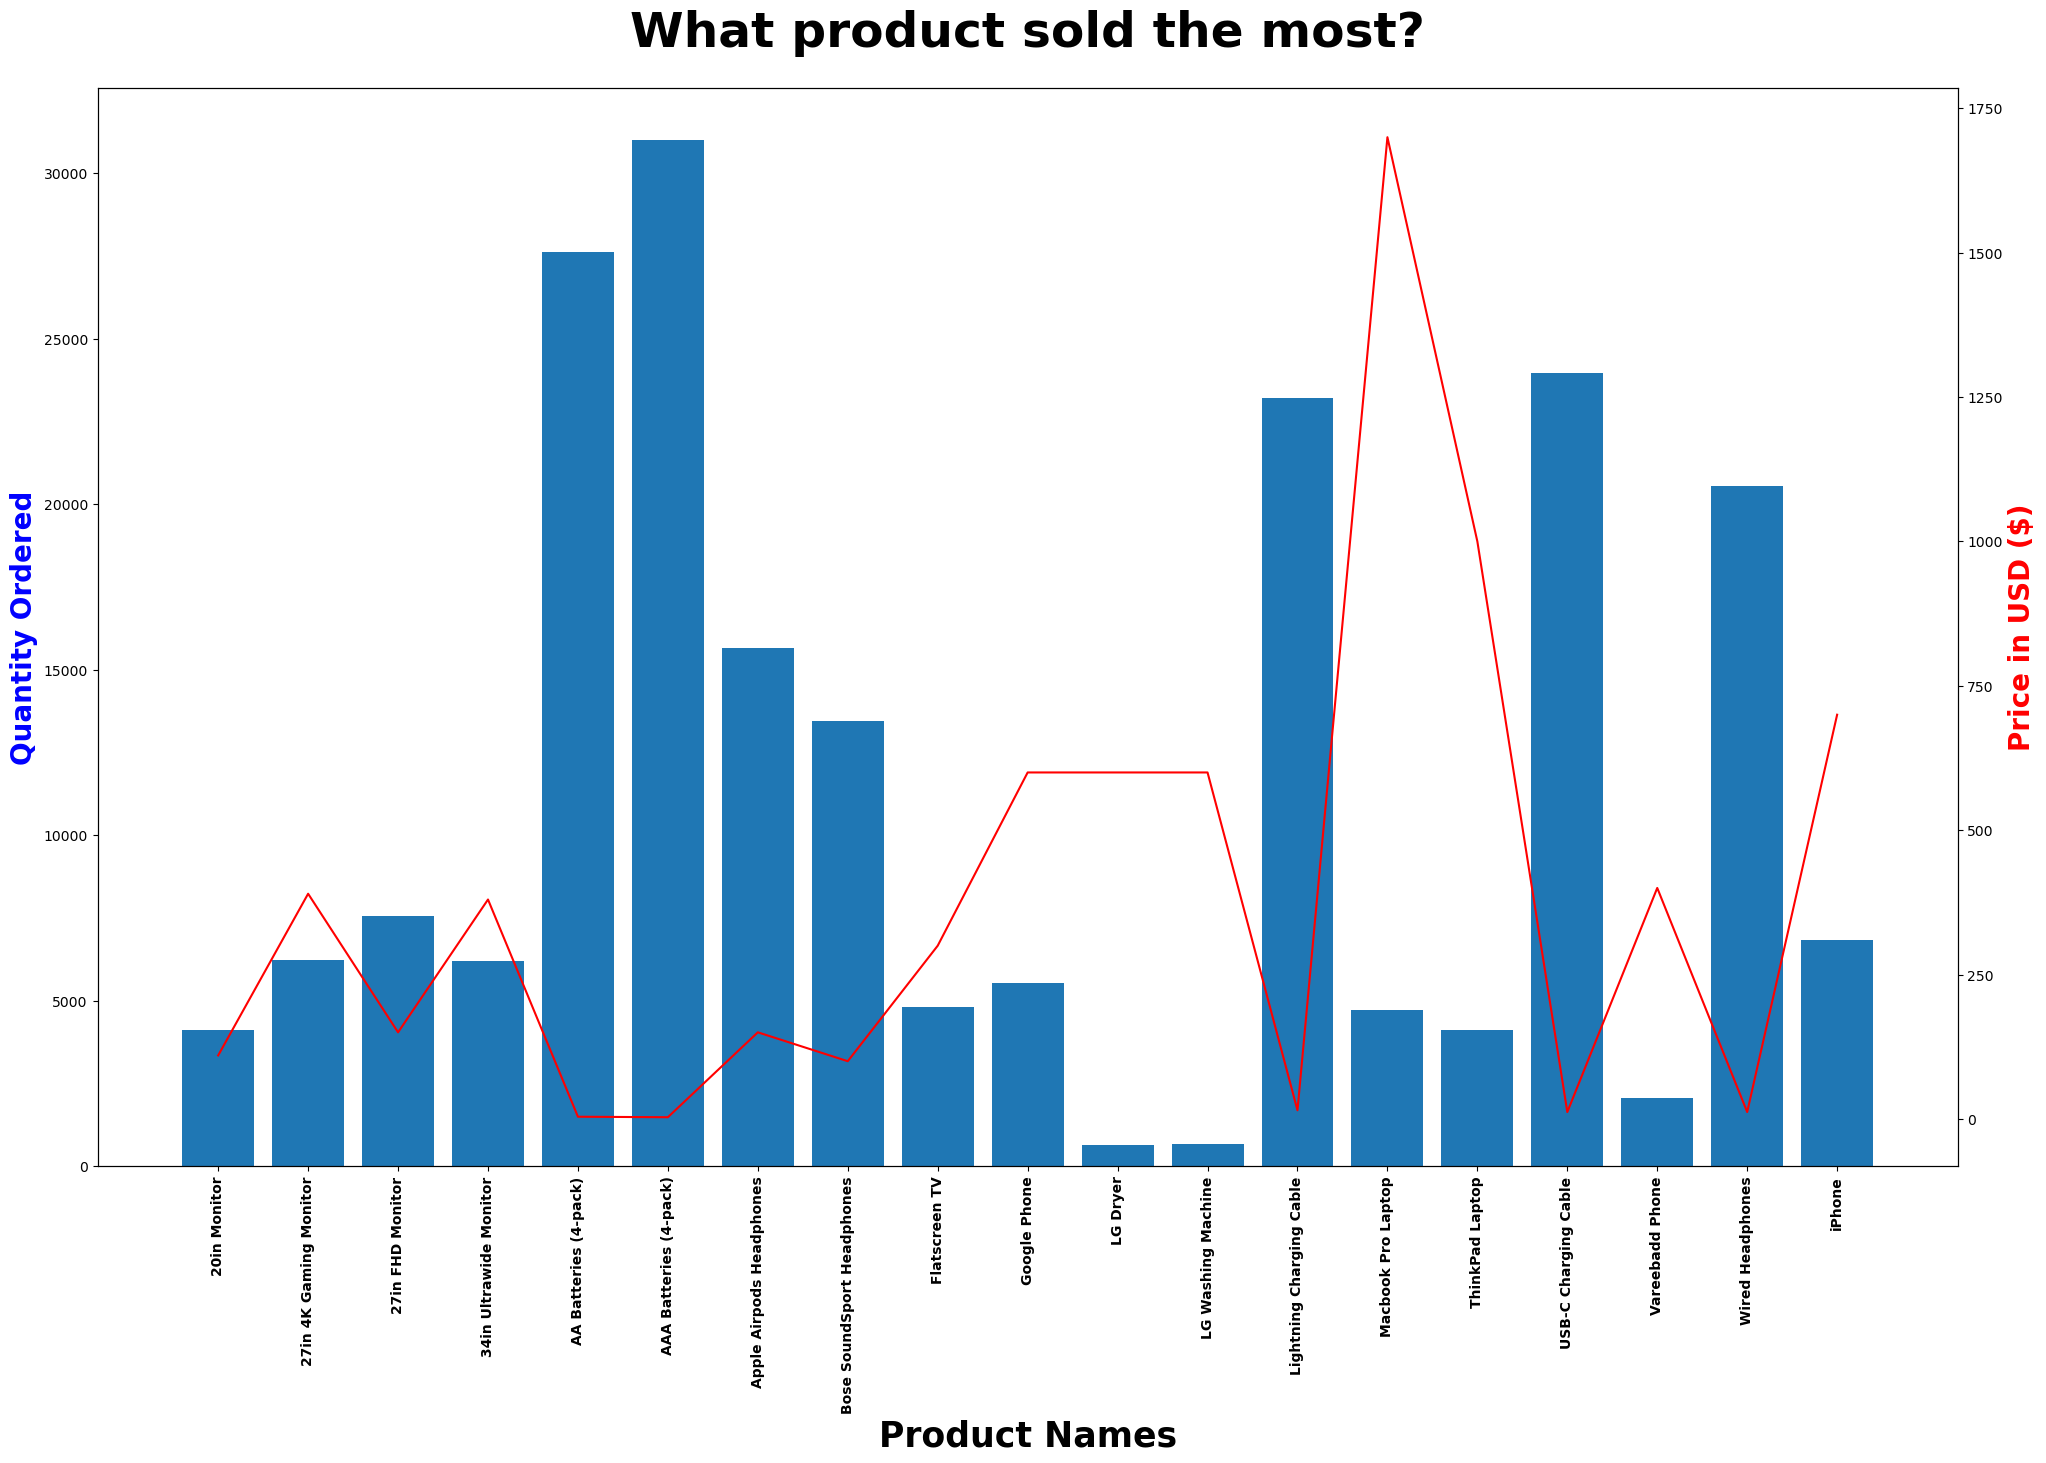

In [10]:
#A combination chart is a good way to visualize this. This combines a linegraph and a bargraph
# lets prepare the varables for the plotting
# group the product
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = sales_data.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]


# let's make subplots
fig, ax1 = plt.subplots(figsize=(24, 14))
ax2 = ax1.twinx()
# firstly, the bar graph
ax1.bar(products, quantity_ordered)
ax1.set_title( 
    "What product sold the most?",
    weight="bold", 
    fontsize=35, 
    pad=30
)
ax1.set_xlabel( 
    "Product Names",
    weight="bold", 
    fontsize=25, 
    color="black"
)
ax1.set_ylabel( 
    "Quantity Ordered", 
    color="blue", 
    fontsize=20, 
    weight="bold" 
)
ax1.set_xticklabels( 
    products, 
    rotation="vertical",  
    weight="bold" 
)
# secondly, the linegraph
sns.lineplot( 
    prices, 
    color="red"
)
ax2.set_ylabel( 
    "Price in USD ($)", 
    color="red", 
    fontsize=20, 
    weight="bold" 
);

The most sold products are AAA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones. The reason for this is most likely because these products have low unit prices, so more units were bought. 